## 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Raw Dataset

In [6]:
# Load dataset
df = pd.read_csv('gender_education_dataset.csv')

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Time Period: {df['year'].min()} - {df['year'].max()}")
print(f"Number of Countries/Regions: {df['country'].nunique()}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW

Shape: 11,970 rows × 7 columns
Time Period: 1980 - 2024
Number of Countries/Regions: 266
Memory Usage: 1.25 MB


## 3. Display Dataset Structure

In [7]:
print("\n" + "="*70)
print("FIRST 10 ROWS")
print("="*70)
display(df.head(10))

print("\n" + "="*70)
print("LAST 10 ROWS")
print("="*70)
display(df.tail(10))


FIRST 10 ROWS


,country,year,Girls_Out_Of_School_Primary,Literacy_Rate_Female,Literacy_Rate_Male,Adolescent_Fertility_Rate,Female_Labor_Force_Participation
0,Afghanistan,1980,NaN,NaN,NaN,131.71,NaN
1,Afghanistan,1981,NaN,NaN,NaN,129.28,NaN
2,Afghanistan,1982,NaN,NaN,NaN,126.95,NaN
3,Afghanistan,1983,NaN,NaN,NaN,127.71,NaN
4,Afghanistan,1984,NaN,NaN,NaN,128.34,NaN
5,Afghanistan,1985,NaN,NaN,NaN,129.25,NaN
6,Afghanistan,1986,NaN,NaN,NaN,128.50,NaN
7,Afghanistan,1987,NaN,NaN,NaN,127.59,NaN
8,Afghanistan,1988,NaN,NaN,NaN,132.39,NaN
9,Afghanistan,1989,NaN,NaN,NaN,135.76,NaN



LAST 10 ROWS


,country,year,Girls_Out_Of_School_Primary,Literacy_Rate_Female,Literacy_Rate_Male,Adolescent_Fertility_Rate,Female_Labor_Force_Participation
11960,Zimbabwe,2015,146134.00,NaN,NaN,102.70,50.22
11961,Zimbabwe,2016,133035.00,NaN,NaN,100.85,50.25
11962,Zimbabwe,2017,128758.00,NaN,NaN,99.05,50.30
11963,Zimbabwe,2018,123909.00,NaN,NaN,98.61,50.37
11964,Zimbabwe,2019,116034.00,93.36,93.07,98.73,50.44
11965,Zimbabwe,2020,111365.00,NaN,NaN,98.89,50.16
11966,Zimbabwe,2021,129944.00,NaN,NaN,99.20,50.09
11967,Zimbabwe,2022,112810.00,NaN,NaN,99.48,49.85
11968,Zimbabwe,2023,127695.00,NaN,NaN,98.06,49.84
11969,Zimbabwe,2024,151054.00,NaN,NaN,NaN,49.74


## 4. Examine Data Types

In [8]:
print("\n" + "="*70)
print("DATA TYPES & INFO")
print("="*70)
print(df.dtypes)
print("\n")
df.info()


DATA TYPES & INFO
country                              object
year                                  int64
Girls_Out_Of_School_Primary         float64
Literacy_Rate_Female                float64
Literacy_Rate_Male                  float64
Adolescent_Fertility_Rate           float64
Female_Labor_Force_Participation    float64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           11970 non-null  object 
 1   year                              11970 non-null  int64  
 2   Girls_Out_Of_School_Primary       3284 non-null   float64
 3   Literacy_Rate_Female              2720 non-null   float64
 4   Literacy_Rate_Male                2699 non-null   float64
 5   Adolescent_Fertility_Rate         11660 non-null  float64
 6   Female_Labor_Force_Participation  8216 n

## 5. Identify Missing Values


MISSING VALUES ANALYSIS


,Missing_Count,Missing_Percentage
Literacy_Rate_Male,9271,77.45
Literacy_Rate_Female,9250,77.28
Girls_Out_Of_School_Primary,8686,72.56
Female_Labor_Force_Participation,3754,31.36
Adolescent_Fertility_Rate,310,2.59
year,0,0.00
country,0,0.00


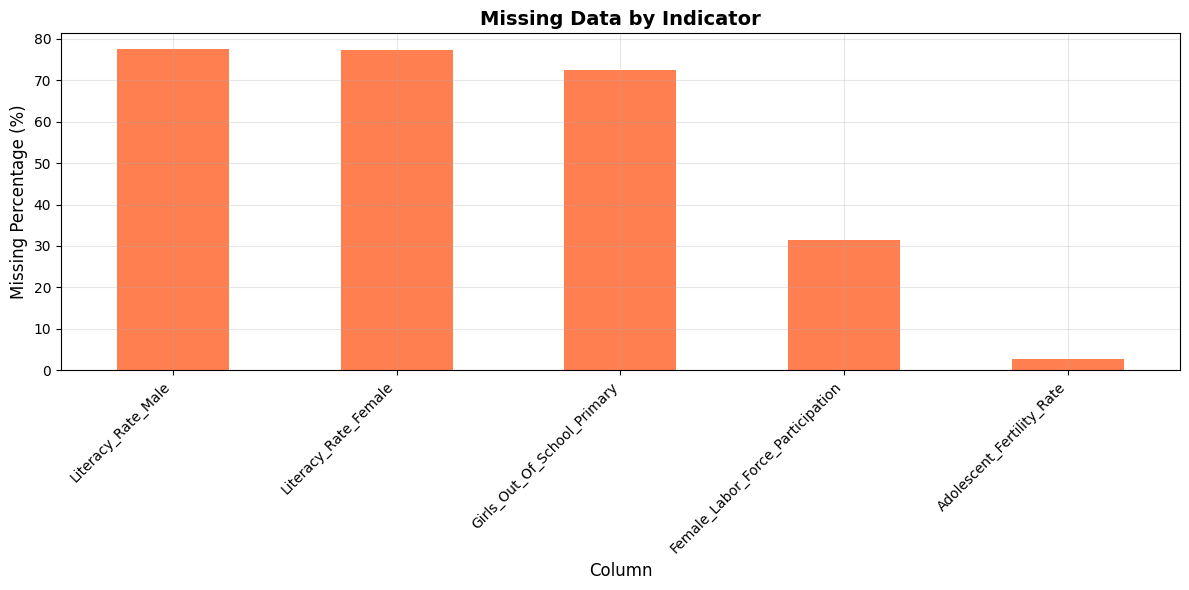

In [9]:
print("\n" + "="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

display(missing_stats)

# Visualize missing data patterns
plt.figure(figsize=(12, 6))
missing_stats[missing_stats['Missing_Count'] > 0]['Missing_Percentage'].plot(kind='bar', color='coral')
plt.title('Missing Data by Indicator', fontsize=14, fontweight='bold')
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Check for Duplicate Records

In [10]:
print("\n" + "="*70)
print("DUPLICATE RECORDS CHECK")
print("="*70)

# Check for duplicates based on country and year
duplicates = df[df.duplicated(subset=['country', 'year'], keep=False)]

print(f"\nDuplicate records found: {len(duplicates)}")
if len(duplicates) > 0:
    print("\nDuplicate examples:")
    display(duplicates.head(20).sort_values(['country', 'year']))
else:
    print("✓ No duplicates found - data integrity confirmed!")


DUPLICATE RECORDS CHECK

Duplicate records found: 0
✓ No duplicates found - data integrity confirmed!


## 7. Explore Temporal Coverage


TEMPORAL COVERAGE ANALYSIS

Time Range: 1980 - 2024 (45 years)

Records per year (sample):
year
1980    266
1981    266
1982    266
1983    266
1984    266
1985    266
1986    266
1987    266
1988    266
1989    266
Name: count, dtype: int64


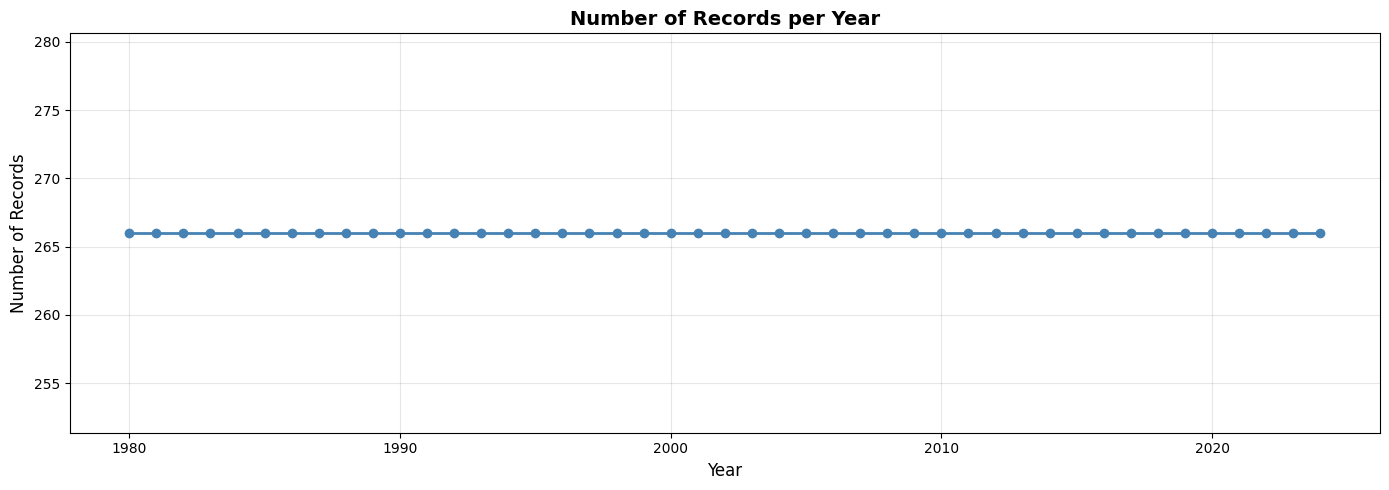

In [11]:
print("\n" + "="*70)
print("TEMPORAL COVERAGE ANALYSIS")
print("="*70)

print(f"\nTime Range: {df['year'].min()} - {df['year'].max()} ({df['year'].max() - df['year'].min() + 1} years)")

# Records per year
records_per_year = df['year'].value_counts().sort_index()
print(f"\nRecords per year (sample):")
print(records_per_year.head(10))

# Visualize temporal coverage
plt.figure(figsize=(14, 5))
records_per_year.plot(kind='line', marker='o', color='steelblue', linewidth=2)
plt.title('Number of Records per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Examine Geographic Coverage

In [12]:
print("\n" + "="*70)
print("GEOGRAPHIC COVERAGE ANALYSIS")
print("="*70)

print(f"\nTotal unique countries/regions: {df['country'].nunique()}")

# Identify aggregate regions (common patterns)
aggregate_keywords = ['World', 'income', 'OECD', 'Arab', 'Asia', 'Africa', 'America', 
                     'Europe', 'Pacific', 'IDA', 'IBRD', 'HIPC', 'dividend', 'small states']
aggregate_regions = df[df['country'].str.contains('|'.join(aggregate_keywords), case=False, na=False)]['country'].unique()

print(f"\nAggregate regions identified: {len(aggregate_regions)}")
print(f"Individual countries: {df['country'].nunique() - len(aggregate_regions)}")

# Years of data per country
country_coverage = df.groupby('country')['year'].agg(['count', 'min', 'max'])
country_coverage['span'] = country_coverage['max'] - country_coverage['min'] + 1

print("\n" + "="*70)
print("SAMPLE: Countries with Most Complete Data")
print("="*70)
display(country_coverage.sort_values('count', ascending=False).head(15))


GEOGRAPHIC COVERAGE ANALYSIS

Total unique countries/regions: 266

Aggregate regions identified: 53
Individual countries: 213

SAMPLE: Countries with Most Complete Data


,count,min,max,span
country,,,,
Zimbabwe,45,1980,2024,45
Afghanistan,45,1980,2024,45
Africa Eastern and Southern,45,1980,2024,45
Africa Western and Central,45,1980,2024,45
Albania,45,1980,2024,45
Algeria,45,1980,2024,45
American Samoa,45,1980,2024,45
Andorra,45,1980,2024,45
Angola,45,1980,2024,45


## 9. Generate Initial Summary Statistics

In [13]:
print("\n" + "="*70)
print("SUMMARY STATISTICS - NUMERIC INDICATORS")
print("="*70)

# Select only indicator columns
indicator_cols = ['Girls_Out_Of_School_Primary', 'Literacy_Rate_Female', 'Literacy_Rate_Male',
                  'Adolescent_Fertility_Rate', 'Female_Labor_Force_Participation']

stats_summary = df[indicator_cols].describe().T
display(stats_summary)


SUMMARY STATISTICS - NUMERIC INDICATORS


,count,mean,std,min,25%,50%,75%,max
Girls_Out_Of_School_Primary,3284.00,547685.87,2672515.83,10.00,3535.25,24156.00,162694.25,41100000.00
Literacy_Rate_Female,2720.00,71.16,22.20,4.59,52.89,75.30,92.06,100.00
Literacy_Rate_Male,2699.00,81.97,14.54,18.26,71.37,84.97,94.81,100.00
Adolescent_Fertility_Rate,11660.00,62.81,46.44,0.47,23.68,52.13,93.16,214.90
Female_Labor_Force_Participation,8216.00,40.40,9.24,6.80,37.86,43.31,46.70,54.95


## 10. Distribution Plots for Key Indicators

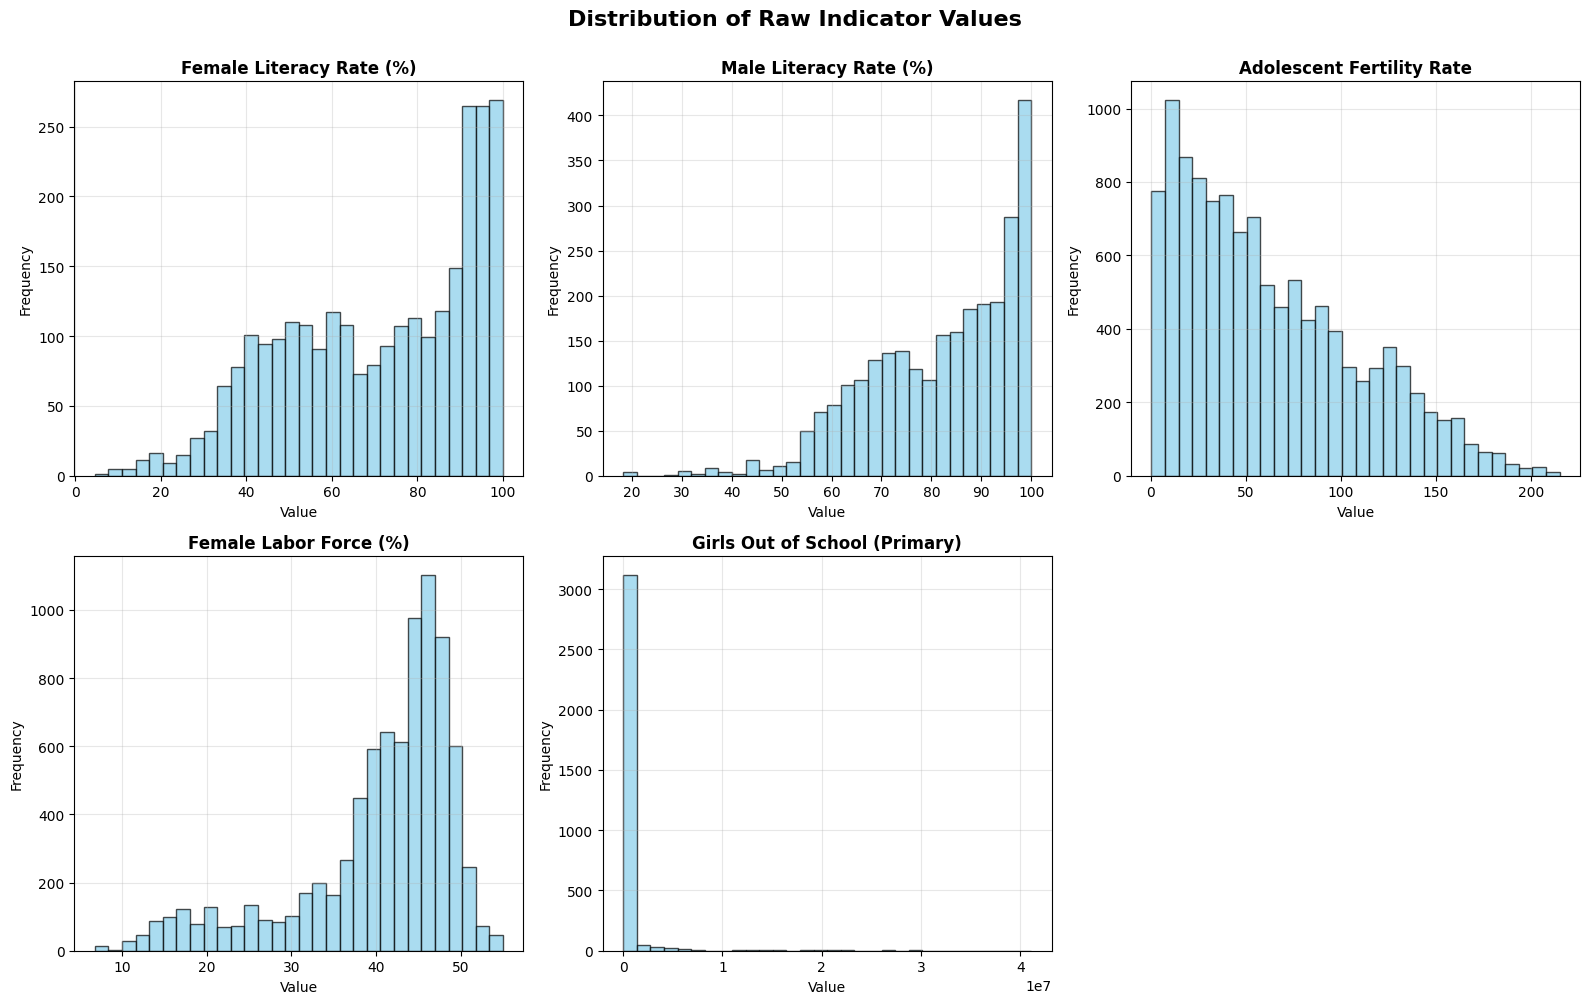

In [14]:
# Create distribution plots for all indicators
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Raw Indicator Values', fontsize=16, fontweight='bold', y=1.00)

indicators = [
    ('Literacy_Rate_Female', 'Female Literacy Rate (%)'),
    ('Literacy_Rate_Male', 'Male Literacy Rate (%)'),
    ('Adolescent_Fertility_Rate', 'Adolescent Fertility Rate'),
    ('Female_Labor_Force_Participation', 'Female Labor Force (%)'),
    ('Girls_Out_Of_School_Primary', 'Girls Out of School (Primary)')
]

for idx, (col, title) in enumerate(indicators):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.3)

# Hide the last subplot (2x3 grid with 5 plots)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Summary & Next Steps

### Key Findings from Initial Exploration:

✅ **Data Loaded Successfully**
- Raw dataset contains country-year observations spanning multiple decades
- Multiple gender education indicators present

✅ **Data Quality Issues Identified**
- Missing values detected in several indicators (will be handled in Notebook 2)
- Aggregate regions mixed with individual countries (will be filtered in Notebook 2)
- No duplicate records detected

✅ **Coverage Assessment**
- Temporal coverage varies by indicator
- Geographic coverage includes both countries and aggregate regions
- Some indicators have more complete data than others

---

### 📋 Next Step: **Notebook 2 - Data Preparation & Cleaning**

In the next notebook, we will:
1. Filter out aggregate regions
2. Focus on relevant time period (1980-2024)
3. Apply hybrid imputation strategy to handle missing values
4. Create derived features (literacy gap, gender equality index, etc.)
5. Save cleaned dataset for analysis

**Ready to proceed!** ✓